# Bag of words

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
corpus = '''Se uma gaivota viesse
Trazer-me o céu de lisboa
No desenho que fizesse
Nesse céu onde o olhar
É uma asa que não voa
Esmorece e cai no mar
Que perfeito coração
No meu peito bateria
Meu amor na tua mão
Nessa mão onde cabia
Perfeito o meu coração'''.split('\n')
len(corpus)

11

In [3]:
cv = CountVectorizer().fit(corpus)

In [4]:
# Devolve o vocabulario, sem ordenacao
vob= cv.vocabulary_
print(len(vob))
print(vob)

33
{'se': 27, 'uma': 30, 'gaivota': 11, 'viesse': 31, 'trazer': 28, 'me': 14, 'céu': 6, 'de': 7, 'lisboa': 12, 'no': 20, 'desenho': 8, 'que': 26, 'fizesse': 10, 'nesse': 19, 'onde': 23, 'olhar': 22, 'asa': 1, 'não': 21, 'voa': 32, 'esmorece': 9, 'cai': 4, 'mar': 13, 'perfeito': 25, 'coração': 5, 'meu': 15, 'peito': 24, 'bateria': 2, 'amor': 0, 'na': 17, 'tua': 29, 'mão': 16, 'nessa': 18, 'cabia': 3}


In [5]:
## Extrair o vocabulario, ordenado
cv.get_feature_names()
## Ordenar o vocabulario, sem usar o feature names
vob = {k: v for k,v in sorted(vob.items(), key = lambda item: item[1])}
# Trocar a chave com o valor para ter o indice como chave
vob2 = {value:key for key,value in vob.items()}

print('vob\n', vob,'\n')
print('vob2\n', vob2)

vob
 {'amor': 0, 'asa': 1, 'bateria': 2, 'cabia': 3, 'cai': 4, 'coração': 5, 'céu': 6, 'de': 7, 'desenho': 8, 'esmorece': 9, 'fizesse': 10, 'gaivota': 11, 'lisboa': 12, 'mar': 13, 'me': 14, 'meu': 15, 'mão': 16, 'na': 17, 'nessa': 18, 'nesse': 19, 'no': 20, 'não': 21, 'olhar': 22, 'onde': 23, 'peito': 24, 'perfeito': 25, 'que': 26, 'se': 27, 'trazer': 28, 'tua': 29, 'uma': 30, 'viesse': 31, 'voa': 32} 

vob2
 {0: 'amor', 1: 'asa', 2: 'bateria', 3: 'cabia', 4: 'cai', 5: 'coração', 6: 'céu', 7: 'de', 8: 'desenho', 9: 'esmorece', 10: 'fizesse', 11: 'gaivota', 12: 'lisboa', 13: 'mar', 14: 'me', 15: 'meu', 16: 'mão', 17: 'na', 18: 'nessa', 19: 'nesse', 20: 'no', 21: 'não', 22: 'olhar', 23: 'onde', 24: 'peito', 25: 'perfeito', 26: 'que', 27: 'se', 28: 'trazer', 29: 'tua', 30: 'uma', 31: 'viesse', 32: 'voa'}


In [6]:
X = cv.transform(corpus)
print(X.toarray())
count = np.sum(X.toarray(), axis=0)
for i in range(len(count)):
    print(i, vob2[i], count[i])

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
0 amor 1
1 asa 1
2 bateria 1
3 cabia 1
4 cai 1
5 coração 2
6 céu 2
7 de 1
8 desenho 1
9 esmorece 1
10 fizesse 1
11 gaivota 1
12 lisboa 1
13 mar 1
14 me 1
15 meu 3
16 mão 2
17 na 1
18 nessa 1
19 nesse 1
20 no 3
21 não 1
22 olhar 1
23 onde 2


## Representação TF-IDF

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [8]:
cv = CountVectorizer().fit(corpus)
X = cv.transform(corpus)
tfidf = TfidfTransformer().fit(X)
X2 = tfidf.transform(X).toarray()
print(X.toarray())
print(np.round(X2, 2))

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.52 0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.52
  0.   0.   0.44 0.52 0.  ]
 [0.   0.   0.   0.   0.   0.   0.39 0.46 0.   0.   0.   0.   0.46 0.


In [9]:
tfidf = TfidfVectorizer().fit(corpus)
X3 = tfidf.transform(corpus).toarray()

In [10]:
print(X2[:,:5])


[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.48248419 0.         0.         0.        ]
 [0.         0.         0.         0.         0.52962134]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.56521933 0.         0.        ]
 [0.48248419 0.         0.         0.         0.        ]
 [0.         0.         0.         0.5375069  0.        ]
 [0.         0.         0.         0.         0.        ]]


In [11]:
print(X3[:,:5])


[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.48248419 0.         0.         0.        ]
 [0.         0.         0.         0.         0.52962134]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.56521933 0.         0.        ]
 [0.48248419 0.         0.         0.         0.        ]
 [0.         0.         0.         0.5375069  0.        ]
 [0.         0.         0.         0.         0.        ]]


# Base de dados IMDb

In [12]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [13]:
D = load_files('aclImdb/train')
Docs = D.data
y = D.target
fNames = D.filenames

In [14]:
tfidf = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w\w+\b').fit(Docs)
tokens = tfidf.get_feature_names()
print(len(tokens))

34258


In [15]:
Docs = [doc.decode('UTF-8') for doc in Docs]
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z]+', ' ', doc) for doc in Docs]

D = Docs[1]
D

'Words can t describe how bad this movie is I can t explain it by writing only You have too see it for yourself to get at grip of how horrible a movie really can be Not that I recommend you to do that There are so many clich s mistakes and all other negative things you can imagine here that will just make you cry To start with the technical first there are a LOT of mistakes regarding the airplane I won t list them here but just mention the coloring of the plane They didn t even manage to show an airliner in the colors of a fictional airline but instead used a painted in the original Boeing livery Very bad The plot is stupid and has been done many times before only much much better There are so many ridiculous moments here that i lost count of it really early Also I was on the bad guys side all the time in the movie because the good guys were so stupid Executive Decision should without a doubt be you re choice over this one even the Turbulence movies are better In fact every other movie

In [16]:
tfidf = TfidfVectorizer(min_df=5, token_pattern=r'\b\w\w\w\w+\b').fit(Docs)
tokens = tfidf.get_feature_names()
print(len(tokens))

25855


# Stemmers
## Reduzir ainda mais o numero de tokens

Eliminar palavras mal escritas ou com significado muito semelhantes entre elas

In [17]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

In [18]:
stemFunc = PorterStemmer()
voc = tfidf.get_feature_names()
voc2 = [stemFunc.stem(w) for w in voc]
print(voc[:100])
print('\n-------------------------------------------------------------\n')
print(voc2[:100])
print(len(np.unique(voc2)))

['aames', 'aamir', 'aankhen', 'aardman', 'aaron', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abbas', 'abbey', 'abbot', 'abbott', 'abbreviated', 'abby', 'abduct', 'abducted', 'abduction', 'abel', 'abetted', 'abhay', 'abhishek', 'abhorrent', 'abiding', 'abigail', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'aboard', 'abode', 'abominable', 'abomination', 'abominations', 'aboriginal', 'aborigine', 'aborigines', 'aborted', 'abortion', 'abortions', 'abound', 'abounds', 'about', 'above', 'abraham', 'abrahams', 'abrasive', 'abridged', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absentee', 'absolute', 'absolutely', 'absolution', 'absolutly', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'absorption', 'abstract', 'abstractions', 'absurd', 'absurdist', 'absurdities', 'absurdity', 'absurdly', 'absurdness', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuser', 'abuses', 'abusing', 'abusive', 'abysmal', 'abysmally', 'abyss', '

In [19]:
doc = Docs[1]
doc2 = ' '.join([stemFunc.stem(w) for w in doc.split()])
print(doc)
print('\n-------------------------------------------------------------\n')
print(doc2)



Words can t describe how bad this movie is I can t explain it by writing only You have too see it for yourself to get at grip of how horrible a movie really can be Not that I recommend you to do that There are so many clich s mistakes and all other negative things you can imagine here that will just make you cry To start with the technical first there are a LOT of mistakes regarding the airplane I won t list them here but just mention the coloring of the plane They didn t even manage to show an airliner in the colors of a fictional airline but instead used a painted in the original Boeing livery Very bad The plot is stupid and has been done many times before only much much better There are so many ridiculous moments here that i lost count of it really early Also I was on the bad guys side all the time in the movie because the good guys were so stupid Executive Decision should without a doubt be you re choice over this one even the Turbulence movies are better In fact every other movie 

Fazer a vectorizacao dos documentos com os stemmers respetivos

In [20]:
stemFunc = PorterStemmer()
Docs2  = [' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs]
tfidf1 = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w+\b').fit(Docs2)
tokens1= tfidf.get_feature_names()
print(len(tokens))

25855


In [21]:
stemFunc = SnowballStemmer('english')
Docs2  = [' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs]
tfidf2 = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w+\b').fit(Docs2)
tokens2= tfidf.get_feature_names()
print(len(tokens))

25855


In [22]:
stemFunc = LancasterStemmer()
Docs2 = [' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs]
tfidf3 = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w+\b').fit(Docs2)
tokens3= tfidf.get_feature_names()
print(len(tokens))

25855


## Representação tf-idf

In [23]:
X =tfidf3.transform(Docs2)
print(X.shape, type(X))

(25000, 18920) <class 'scipy.sparse.csr.csr_matrix'>


In [24]:
xM = np.max(X, axis=0).toarray().squeeze()
idx= np.argsort(-xM)
voc= [tokens3[i] for i in idx]
print(voc[:100])

['kattan', 'chivalry', 'gene', 'conchita', 'mystique', 'mcqueen', 'google', 'rediscovery', 'mcanally', 'randy', 'obtains', 'christ', 'camping', 'remotely', 'beatle', 'clift', 'library', 'hormone', 'bleak', 'cancellation', 'followed', 'letterboxed', 'digest', 'garfield', 'chosen', 'liberating', 'harem', 'overseas', 'middle', 'humiliate', 'baked', 'chimp', 'dresser', 'atheist', 'reckoning', 'childhood', 'dullness', 'complicit', 'chang', 'launches', 'fills', 'inhabits', 'referred', 'drug', 'implicate', 'event', 'outgoing', 'backdrops', 'blurbs', 'ears', 'repetitious', 'confrontations', 'durbin', 'meander', 'mining', 'remedy', 'disaster', 'disenfranchised', 'redundancy', 'dimwitted', 'involuntary', 'replacing', 'assigned', 'bewildering', 'aztec', 'floppy', 'afro', 'bound', 'garth', 'infest', 'folksy', 'belmondo', 'joke', 'brisk', 'counselor', 'nearest', 'dinocroc', 'parks', 'loaned', 'historic', 'drool', 'heartwarming', 'align', 'flickering', 'himmelen', 'jocks', 'goofball', 'clip', 'harmo

In [25]:
xTmp = np.max(X, axis=0)
print(xTmp.shape, type(xTmp))

(1, 18920) <class 'scipy.sparse.coo.coo_matrix'>


### Inverse tfidf 

In [26]:
idf = tfidf.idf_
idx = np.argsort(idf)
voc = [tokens[i] for i in idx]
print(voc[:100])

['this', 'that', 'with', 'movie', 'have', 'film', 'from', 'like', 'they', 'there', 'just', 'about', 'what', 'some', 'good', 'more', 'when', 'time', 'very', 'even', 'only', 'would', 'really', 'story', 'which', 'well', 'than', 'much', 'their', 'were', 'other', 'been', 'most', 'also', 'into', 'first', 'made', 'great', 'because', 'will', 'people', 'make', 'could', 'after', 'then', 'them', 'watch', 'think', 'acting', 'movies', 'seen', 'characters', 'many', 'plot', 'being', 'never', 'best', 'little', 'character', 'ever', 'know', 'where', 'over', 'better', 'life', 'films', 'does', 'love', 'still', 'here', 'your', 'these', 'while', 'should', 'something', 'such', 'through', 'back', 'scenes', 'watching', 'scene', 'those', 'thing', 'real', 'years', 'doesn', 'actors', 'another', 'before', 'though', 'director', 'makes', 'work', 'didn', 'look', 'actually', 'nothing', 'find', 'going', 'show']


## Analise dos coeficientes dum discriminate logistico

In [27]:
D1 = load_files('aclImdb/train')
D2 = load_files('aclImdb/test')

In [28]:
Docs1 = D1.data
y1 = D1.target
Docs2 = D2.data
y2 = D2.target

In [29]:
def preprocssTextData(Docs):
    Docs = [doc.decode('UTF-8') for doc in Docs]
    Docs = [doc.replace('<br />', ' ') for doc in Docs]
    Docs = [re.sub(r'[^a-zA-Z\u00C0\u00FF]+', ' ', doc) for doc in Docs]
    return Docs

Docs1 = preprocssTextData(Docs1)
Docs2 = preprocssTextData(Docs2)

tfidf = TfidfVectorizer(min_df=5, token_pattern=r'\b\w\w\w\w+\b').fit(Docs1)
X1 = tfidf.transform(Docs1)
X2 = tfidf.transform(Docs2)

In [30]:
print(X1.shape)
print(X2.shape)

(25000, 25855)
(25000, 25855)


In [31]:
from sklearn.linear_model import LogisticRegression

dl = LogisticRegression(max_iter = 1000, C=1, tol = 1e-3)
dl.fit(X1,y1)
print(dl.score(X1,y1))
print(dl.score(X2,y2))

0.9324
0.87988


In [32]:
w = dl.coef_
idx= np.argsort(w).squeeze()
voc=tfidf.get_feature_names()
voc2 = [voc[i] for i in idx]
print(voc2[:50])
print('\n', '-'*100 , '\n')
print(voc2[-50:])

['worst', 'awful', 'waste', 'boring', 'poor', 'worse', 'terrible', 'nothing', 'poorly', 'horrible', 'dull', 'unfortunately', 'annoying', 'script', 'ridiculous', 'stupid', 'disappointment', 'fails', 'supposed', 'disappointing', 'avoid', 'minutes', 'instead', 'mess', 'badly', 'even', 'lame', 'save', 'pointless', 'unless', 'lacks', 'just', 'weak', 'money', 'crap', 'predictable', 'attempt', 'laughable', 'wonder', 'plot', 'reason', 'only', 'looks', 'unfunny', 'couldn', 'idea', 'pathetic', 'wasted', 'tries', 'mediocre']

 ---------------------------------------------------------------------------------------------------- 

['surprised', 'recommended', 'subtle', 'beautifully', 'moving', 'refreshing', 'especially', 'unique', 'makes', 'masterpiece', 'will', 'shows', 'incredible', 'true', 'simple', 'classic', 'life', 'funniest', 'perfectly', 'heart', 'hilarious', 'entertaining', 'very', 'world', 'wonderfully', 'both', 'rare', 'enjoyable', 'enjoy', 'liked', 'also', 'still', 'definitely', 'fantast

In [33]:
print(w.shape)

(1, 25855)


128


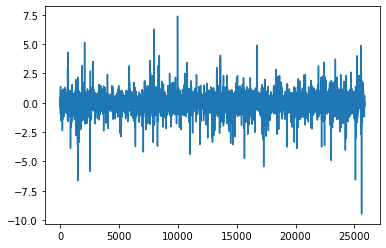

In [34]:
w=w.squeeze()
plt.plot(w)
print(np.sum(np.abs(w)<=1e-3))

### Lasso

In [35]:
from sklearn.linear_model import LogisticRegression

dl = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=0.10, tol= 1e-3)
dl.fit(X1, y1)
print(dl.score(X1, y1))
print(dl.score(X2, y2))

0.8076
0.80492


In [36]:
w = dl.coef_
w = w.squeeze()
print(np.sum(w!=0))
voc = tfidf.get_feature_names()
idx = np.argsort(w)
voc2= [voc[i] for i in idx]
print(voc2[:50])
print('\n', '-'*100 , '\n')
print(voc2[-50:])

98
['worst', 'waste', 'awful', 'boring', 'poor', 'terrible', 'nothing', 'worse', 'script', 'stupid', 'minutes', 'horrible', 'even', 'poorly', 'plot', 'just', 'supposed', 'dull', 'unfortunately', 'instead', 'there', 'only', 'lame', 'ridiculous', 'acting', 'money', 'annoying', 'crap', 'avoid', 'they', 'would', 'thing', 'make', 'this', 'least', 'better', 'could', 'then', 'movie', 'idea', 'didn', 'reason', 'looks', 'have', 'mess', 'were', 'fails', 'half', 'been', 'attempt']

 ---------------------------------------------------------------------------------------------------- 

['fernandez', 'financial', 'fernando', 'finances', 'financed', 'finance', 'ferocious', 'financially', 'festive', 'liked', 'performance', 'classic', 'each', 'true', 'especially', 'story', 'most', 'shows', 'family', 'fantastic', 'enjoy', 'series', 'heart', 'always', 'years', 'superb', 'definitely', 'seen', 'world', 'both', 'enjoyed', 'brilliant', 'still', 'will', 'today', 'highly', 'also', 'life', 'beautiful', 'very', 

## Guardar ordem das palavras - n gramas

In [37]:
Docs1 = D1.data
y1 = D1.target
Docs2 = D2.data
y2 = D2.target

In [38]:
Docs1 = preprocssTextData(Docs1)
Docs2 = preprocssTextData(Docs2)

tfidf = TfidfVectorizer(min_df=5, ngram_range=(1,4), token_pattern=r'\b\w\w\w+\b').fit(Docs1)
X1 = tfidf.transform(Docs1)
X2 = tfidf.transform(Docs2)

print('Dimensao do vocabulario:' , X1.shape[1])

Dimensao do vocabulario: 203983


In [39]:
xM = np.max(X1, axis=0).toarray().squeeze()
idx=np.argsort(-xM)
tokens = tfidf.get_feature_names()
voc= [tokens[i] for i in idx]
print(voc[:100])

wC = np.array([len(w.split()) for w in voc])
print('Dimensao do vocabulario:', X1.shape[1])
print('Numero de uni-gramas:', np.sum(wC==1))
print('Numero de bi-gramas:', np.sum(wC==2))
print('Numero de tri-gramas:', np.sum(wC==3))
print('Numero de quadri-gramas:', np.sum(wC==4))

['scanners', 'pokemon', 'wei', 'casper', 'dev', 'woo', 'more more', 'zizek', 'botched', 'xica', 'hackenstein', 'khouri', 'darkman', 'lennon', 'demons', 'smallville', 'shearer', 'tanner', 'ichi', 'othello', 'zatoichi', 'gadget', 'gamera', 'darius', 'naschy', 'beetle', 'coop', 'dahmer', 'alvin', 'kriemhild', 'soha', 'joan', 'stefan', 'basket', 'paulie', 'kyle', 'biko', 'puppet master', 'seagal', 'jill', 'winfield', 'dillinger', 'macarthur', 'che', 'timon', 'dominick', 'lincoln', 'kolchak', 'librarians', 'the doodlebops', 'cypher', 'foo', 'kusturica', 'steve', 'ants', 'lassie', 'muppet', 'kornbluth', 'chiba', 'oprah', 'ranma', 'blank check', 'ripley', 'janeane', 'doodlebops', 'lexi', 'creasy', 'wang', 'pierce', 'homer', 'europa', 'gruner', 'karloff', 'dressler', 'luzhin', 'worms', 'sasquatch', 'weller', 'tobacco', 'raj', 'pack', 'gypo', 'brendan', 'azumi', 'zombi', 'elvira', 'jigsaw', 'mathieu', 'modesty', 'old person', 'bruce', 'morty', 'cheech', 'scarlet', 'gilliam', 'mindy', 'gandhi', 

In [40]:
dl = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=0.1, tol= 1e-3)
dl.fit(X1, y1)
print(dl.score(X1, y1))
print(dl.score(X2, y2))

w = dl.coef_
w = w.squeeze()
print(np.sum(w!=0))
voc = tfidf.get_feature_names()
idx = np.argsort(w)
voc2= [voc[i] for i in idx]
print(voc2[:50])
print('\n', '-'*100 , '\n')
print(voc2[-50:])

0.77096
0.77456
45
['worst', 'bad', 'waste', 'awful', 'boring', 'nothing', 'poor', 'even', 'just', 'terrible', 'plot', 'minutes', 'stupid', 'script', 'they', 'there', 'why', 'any', 'was', 'only', 'worse', 'this', 'movie', 'would', 'horrible', 'have', 'not', 'make', 'could', 'she claims', 'she falls love with', 'she fantastic', 'she far', 'she feels', 'she can get', 'she feels she', 'she fell', 'she felt', 'she female', 'she finally', 'she find', 'she finds', 'she finds her', 'she finds herself', 'she finds out', 'she finds out that', 'she finds that', 'she first', 'she can even', 'she falls love']

 ---------------------------------------------------------------------------------------------------- 

['good but this one', 'good but very', 'good but was', 'good but not great', 'good but when', 'good camera', 'good camera work', 'good can', 'good car', 'good career', 'good cast', 'good cast and', 'good casting', 'good category', 'good chance', 'good bye', 'good but not', 'good but nothin

In [41]:
dl = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=1, tol= 1e-3)
dl.fit(X1, y1)
print(dl.score(X1, y1))
print(dl.score(X2, y2))

w = dl.coef_
w = w.squeeze()
print(np.sum(w!=0))
voc = tfidf.get_feature_names()
idx = np.argsort(w)
voc2= [voc[i] for i in idx]
print(voc2[:50])
print('\n', '-'*100 , '\n')
print(voc2[-50:])

0.88516
0.87748
630
['worst', 'waste', 'awful', 'boring', 'poorly', 'bad', 'dull', 'poor', 'disappointment', 'fails', 'horrible', 'worse', 'terrible', 'annoying', 'mess', 'disappointing', 'unfortunately', 'laughable', 'pointless', 'nothing', 'lacks', 'avoid', 'not worth', 'ridiculous', 'save', 'badly', 'lame', 'supposed', 'script', 'stupid', 'unfunny', 'instead', 'redeeming', 'pathetic', 'minutes', 'unless', 'crap', 'forgettable', 'wasted', 'than this', 'predictable', 'not even', 'way too', 'looks', 'attempt', 'wonder', 'basically', 'weak', 'wooden', 'mediocre']

 ---------------------------------------------------------------------------------------------------- 

['subtle', 'especially', 'hilarious', 'job', 'world', 'surprised', 'better than', 'entertaining', 'seen', 'also', 'enjoy', 'beautifully', 'both', 'gem', 'touching', 'still', 'the best', 'this great', 'incredible', 'love', 'well', 'liked', 'bit', 'funniest', 'simple', 'noir', 'perfectly', 'beautiful', 'refreshing', 'rare', 'd

In [42]:
dl = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=10, tol= 1e-3)
dl.fit(X1, y1)
print(dl.score(X1, y1))
print(dl.score(X2, y2))

w = dl.coef_
w = w.squeeze()
print(np.sum(w!=0))
voc = tfidf.get_feature_names()
idx = np.argsort(w)
voc2= [voc[i] for i in idx]
print(voc2[:50])
print('\n', '-'*100 , '\n')
print(voc2[-50:])

0.9962
0.88816
6855
['waste', 'not worth', 'awful', 'worst', 'disappointment', 'poorly', 'boring', 'lacks', 'forgettable', 'laughable', 'mess', 'worse', 'unfunny', 'one the worst', 'horrible', 'disappointing', 'fails', 'avoid', 'poor', 'this film just', 'bad', 'pointless', 'annoying', 'the introduction', 'badly', 'alright', 'baldwin', 'lousy', 'dull', 'save', 'redeeming', 'obnoxious', 'basically', 'fast forward', 'not recommend', 'terrible', 'the excellent', 'very disappointed', 'unfortunately', 'way too', 'let down', 'not recommended', 'ridiculous', 'supposed', 'had high', 'pretentious', 'unwatchable', 'britney', 'unconvincing', 'than this']

 ---------------------------------------------------------------------------------------------------- 

['noir', 'loved', 'even better', 'may not', 'gem', 'recommended', 'predictable but', 'surprisingly', 'underrated', 'very good', 'atmosphere', 'better but', 'the movie however', 'british comedy', 'subtle', 'love this', 'likable and', 'must see',